In [1]:
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import pandas as pd
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import optimizers
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout, LSTM
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import load_model
from PIL import Image
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

In [2]:
#CREATE TRAIN DATA
dir = "/Users/mac/Desktop/archive/Train"
train_data = []
img_size = 32
non_chars = ["#", "$", "&"]

for i in os.listdir(dir):
    if i in non_chars:
        continue
    file_path = os.path.join(dir, i)
    if not os.path.isdir(file_path):
        continue
    count = 0
    for j in os.listdir(file_path):
        count += 1
        if count > 4000:
            break
        img_path = os.path.join(file_path, j)
        if not os.path.isfile(img_path):
            continue
        _, ext = os.path.splitext(img_path)
        if ext.lower() == '.png':
            # Convert PNG to JPEG
            img = Image.open(img_path)
            img = img.convert('RGB')  # Convert to RGB mode if necessary
            img_path = img_path.replace('.png', '.jpg')
            img.save(img_path, 'JPEG')

        img = cv2.imread(img_path, 0)
        if img is None:
            continue

        img = cv2.resize(img, (img_size, img_size))
        if i == "_":
            train_data.append([img, ":"])
        elif i== ":":
            train_data.append([img,"/"])
        else:
            train_data.append([img, i])

#CREATE VALIDATION DATA
val_dir = "/Users/mac/Desktop/archive/Validation"
val_data = []
img_size = 32

for i in os.listdir(val_dir):
    if i in non_chars:
        continue
    file_path = os.path.join(val_dir, i)
    if not os.path.isdir(file_path):
        continue
    count = 0
    for j in os.listdir(file_path):
        count += 1
        if count > 1000:
            break
        img_path = os.path.join(file_path, j)
        if not os.path.isfile(img_path):
            continue
        _, ext = os.path.splitext(img_path)
        if ext.lower() == '.png':
            img = Image.open(img_path)
            img = img.convert('RGB')
            img_path = img_path.replace('.png', '.jpg')
            img.save(img_path, 'JPEG')
        try:
            img = cv2.imread(img_path, 0)
            img = cv2.resize(img, (img_size, img_size))
        except Exception as e:
            print(f"Error processing image: {img_path}")
            continue
        if i == "_":
            val_data.append([img, ":"])
        elif i== ":":
            val_data.append([img,"/"])
        else:
            val_data.append([img, i])
        
random.shuffle(train_data)
random.shuffle(val_data)

Error processing image: /Users/mac/Desktop/archive/Validation/U/.DS_Store
Error processing image: /Users/mac/Desktop/archive/Validation/I/.DS_Store
Error processing image: /Users/mac/Desktop/archive/Validation/G/.DS_Store
Error processing image: /Users/mac/Desktop/archive/Validation/Z/.DS_Store
Error processing image: /Users/mac/Desktop/archive/Validation/S/.DS_Store
Error processing image: /Users/mac/Desktop/archive/Validation/F/.DS_Store
Error processing image: /Users/mac/Desktop/archive/Validation/O/.DS_Store
Error processing image: /Users/mac/Desktop/archive/Validation/M/.DS_Store
Error processing image: /Users/mac/Desktop/archive/Validation/J/.DS_Store
Error processing image: /Users/mac/Desktop/archive/Validation/C/.DS_Store
Error processing image: /Users/mac/Desktop/archive/Validation/V/.DS_Store
Error processing image: /Users/mac/Desktop/archive/Validation/Q/.DS_Store
Error processing image: /Users/mac/Desktop/archive/Validation/X/.DS_Store
Error processing image: /Users/mac/Des

In [3]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [4]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

print(train_X.shape,val_X.shape)
print(train_Y.shape,val_Y.shape)

(149318, 32, 32, 1) (37037, 32, 32, 1)
(149318, 39) (37037, 39)


In [5]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding="same", activation='relu', input_shape=(32, 32, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), padding="same", activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [13]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding="same", activation='relu', input_shape=(32, 32, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), padding="same", activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(39, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [6]:
# Cargar el modelo guardado
model = load_model('modelo_entrenado.h5')

In [26]:
history = model.fit(train_X,train_Y, epochs=1, batch_size=1024, validation_data = (val_X, val_Y),  verbose=1)

146/146 [==============================] - 38s 258ms/step - loss: 0.1020 - accuracy: 0.9558 - val_loss: 0.6975 - val_accuracy: 0.8526


In [25]:
# SAVE THE MODEL
model.save('combine_model.h5')

In [27]:
def preprocess_image(image):
    if image is None or image.size == 0:
        return None
    # Redimensionar la imagen para mejorar la resolución
    resized = cv2.resize(image, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)
    # Aplicar un enfoque para mejorar la nitidez
    sharpened = cv2.detailEnhance(resized, sigma_s=20, sigma_r=0.2)
    # Retornar la imagen preprocesada
    return sharpened

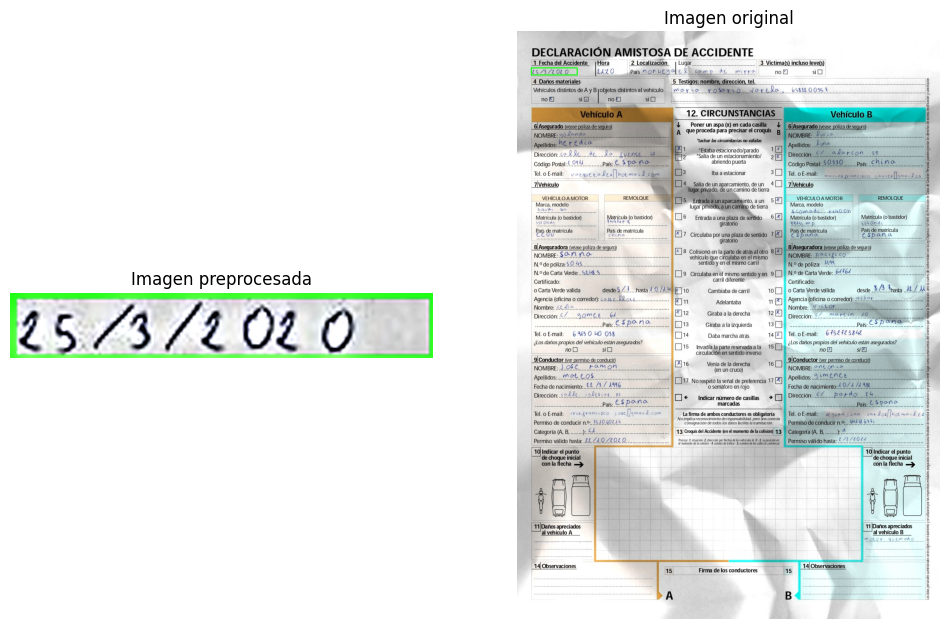

Texto extraído:


In [28]:
from PIL import Image
image = Image.open("a.jpg")
image = np.array(image)
# Definir las coordenadas del rectángulo
x = 40# Coordenada x del vértice superior izquierdo
y = 104 # Coordenada y del vértice superior izquierdo
w = 130  # Nuevo ancho del rectángulo (mayor que el valor anterior)
h = 20 # Nuevo alto del rectángulo (mayor que el valor anterior)

# Dibujar el rectángulo en la imagen
cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
roi = image[y:y+h, x:x+w]
# Preprocesar la imagen
preprocessed_image = preprocess_image(roi)

# Mostrar la imagen preprocesada y el texto extraído
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(preprocessed_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Imagen preprocesada')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Imagen original')
plt.show()
print("Texto extraído:")

1/1 [==============================] - 0s 14ms/step
Detected letters: ['2', 'F', 'L', '3', 'L', '2', '0', '2', '0']
Recognized word: 2FL3L2020


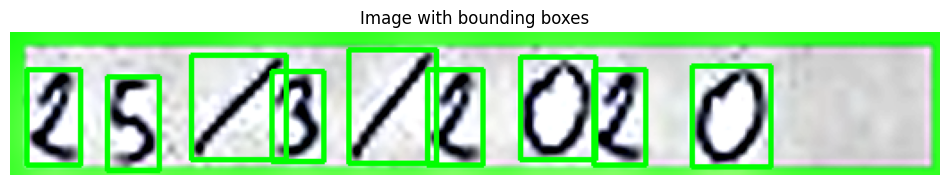

In [29]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                         key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

def get_letters(image):
    letters = []
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            roi = gray[int(y):int(y) + int(h), int(x):int(x) + int(w)]  # Convert coordinates to integers
            thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            thresh = cv2.resize(thresh, (32, 32), interpolation=cv2.INTER_CUBIC)
            thresh = thresh.astype("float32") / 255.0
            thresh = np.expand_dims(thresh, axis=-1)
            thresh = thresh.reshape(1, 32, 32, 1)
            ypred = model.predict(thresh)
            ypred = LB.inverse_transform(ypred)
            [x] = ypred
            letters.append(str(x))
    return letters, image

def get_word(letters):
    word = "".join(letters)
    return word

# Example usage

letters, image_with_boxes = get_letters(preprocessed_image)
word = get_word(letters)
print("Detected letters:", letters)
print("Recognized word:", word)
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
plt.title("Image with bounding boxes")
plt.axis('off')
plt.show()